In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import h5py
from tqdm import tqdm # progress bar for loops, interrupt if needed
from scipy.optimize import curve_fit

#Formatting for plots
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('bmh')
# DiscModel is in a different file
from src.DiscModel import DiscGalaxy
N = 1000000 # number of stars in the disc
a = 1 # a is the scale length of the disc in kpc
D = DiscGalaxy(N=N,a=a)

rmax = 20.
nbins = 64
mmax = 10
nmax = 10
noise=0.5
"""Recall m corresponds to Fourier (azimuthal) modes, n corresponds to Laguerre (radial harmonics) modes."""

'Recall m corresponds to Fourier (azimuthal) modes, n corresponds to Laguerre (radial harmonics) modes.'

Position Angles: 100%|██████████| 18/18 [00:18<00:00,  1.03s/it]


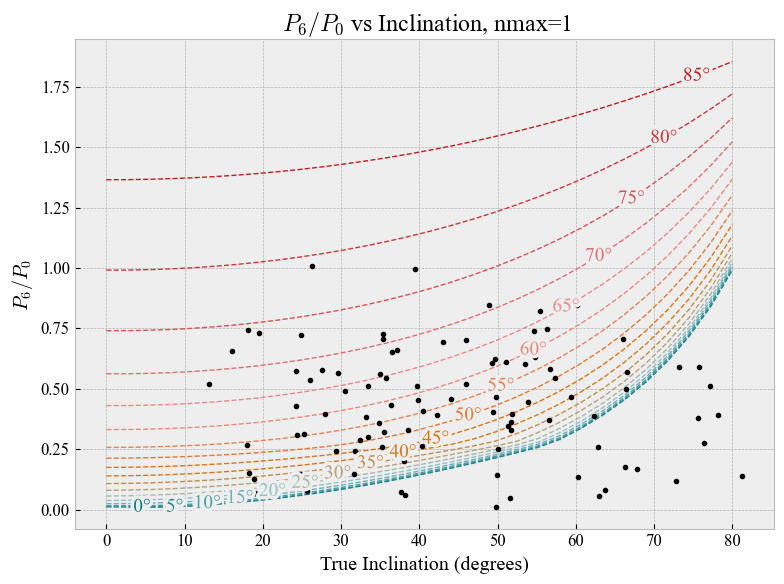

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from labellines import *
from matplotlib.colors import LinearSegmentedColormap

my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0D7D87-99C6CC-DC7004-EE9093-C31E23
    (0.000, (0.051, 0.490, 0.529)),
    (0.250, (0.600, 0.776, 0.800)),
    (0.500, (0.863, 0.439, 0.016)),
    (0.750, (0.933, 0.565, 0.576)),
    (1.000, (0.765, 0.118, 0.137))))
    
# Parameters
inclinations = np.linspace(0, 80, 30)
position_angles = np.arange(0, 90, 5)
colorindx = np.linspace(0, 1, len(position_angles))
mmax, nmax = 7, 2
a = 1.
N = 100000
rmax = 5
nbins = 128
noise = 0.5
Am_fit=0.637
Bm_fit=3.736
Cm_fit=0.032
# Store result
pa_results = {PA: [] for PA in position_angles}

for PA in tqdm(position_angles, desc="Position Angles"):
    for inc in inclinations:
        D = DiscGalaxy(N=N, a=a)
        D.rotate_disc(inc, PA, 0)
        D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)

        E = D.make_pointexpansion(mmax, nmax, a*1.5)

        # Compute fractional powers
        coef_mag = np.sqrt(E.coscoefs**2 + E.sincoefs**2)
        m_power = np.sum(coef_mag, axis=1)
        n_power = np.sum(coef_mag, axis=0)
        fracn_power = n_power 
        fracm_power = m_power 
        # Store P2/P0
        try:
            mratio = fracm_power[2] / fracm_power[0]
        except ZeroDivisionError:
            mratio = np.nan
        pa_results[PA].append(mratio)


plt.figure(figsize=(8, 6))

counter = 0
for PA, ratios in pa_results.items():
    plt.plot(inclinations, ratios, marker='.', markersize=0.1, linewidth=1,linestyle='dashed', label=f'{PA:.0f}°', color=my_gradient(colorindx[counter]))
    counter += 1
    

plt.xlabel("Inclination angle (deg)")
plt.ylabel(r"$P_2/ P_0$")
plt.title(r"$P_2/ P_0$ vs Inclination for Different Position Angles")
labelLines(plt.gca().get_lines(),align=False,fontsize=14)
plt.grid(True)
plt.tight_layout()


import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.colors import LinearSegmentedColormap


npy_files=glob.glob('data/*')

inclinations = []
ratios = []

for file in npy_files:
   
    data = np.load(file, allow_pickle=True)[()]
    coscoefs = data['coscoefs']
    sincoefs = data['sincoefs']
    if coscoefs.shape[2] <= 2:
        print(f"Skipping file {file} due to insufficient coefficients.")
    else:
        P0 = np.sqrt(coscoefs[0,0,0]**2 + sincoefs[0,0,0]**2)
        P4 = np.sqrt(coscoefs[0,0,2]**2 + sincoefs[0,0,2]**2)
        ratio = P4 / P0
        
    

    # Inclination in degrees
    inclination_deg = data['inclination'][0] * 180 / np.pi
   
    
    # Store
    inclinations.append(inclination_deg)
    ratios.append(ratio)


#plot
inclinations = np.array(inclinations)
ratios = np.array(ratios)



plt.plot(inclinations, ratios, '.', color='black', markersize=6, label='Points')
# plt.plot(incl, ratios, 'o', label='Data', color=colours)
#plt.plot(theta_vals, fit_vals, '-', label=f'Fit: A*sin(θ)^B + C\nA={A_fit:.3f}, B={B_fit:.3f}, C={C_fit:.3f}', color='darkorange')


#plt.plot(theta_deg, Rmplot, 'o', label=r'$P_2/P_0$ Fourier Simulation', color='#c31e23')
# plt.plot(test_incl,test_ratios, 'o', label='Estimated Inclinations', color=colours)
""" for i in range(len(test_incl)):
    plt.plot(test_incl[i], ratios[i], '*', color=colours[i], markersize=8) """
plt.xlabel("True Inclination (degrees)")
plt.ylabel(r"$P_6/P_0$")
plt.title(rf" $P_6/P_0$ vs Inclination, nmax={nmax-1}")

plt.grid(True)
plt.tight_layout()
plt.show()





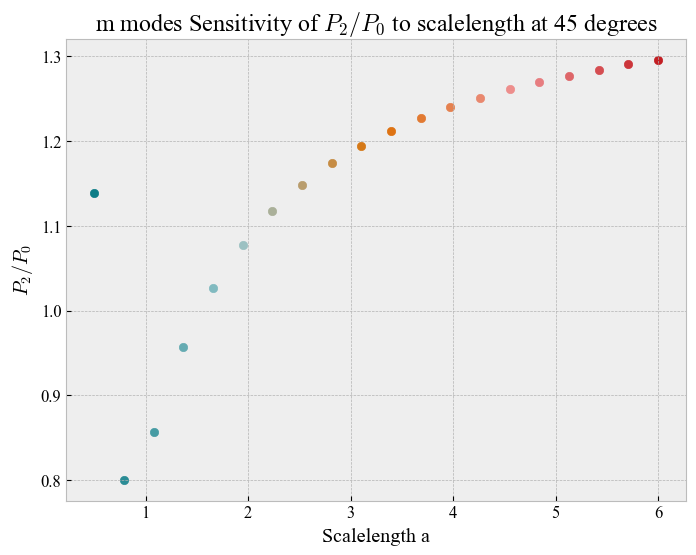

In [ ]:
scalelengths = np.linspace(0.5 , 6, 20)

results = []
    
ratios = []

# Store results
counter = 0
colorindx = np.linspace(0, 1, len(scalelengths))
plt.figure(figsize=(8, 6))
for a in scalelengths:
    inclinations = 45
    
   
    D = DiscGalaxy(N=N, a=1)
    D.rotate_disc(inc, 0, 0)
    D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)
    #D.generate_image(rmax=8.,nbins=512,noiselevel=0.5)

    E = D.make_pointexpansion(mmax, 2, a)
    
    coef_mag = np.sqrt(E.coscoefs**2 + E.sincoefs**2)
    m_power = np.sum(coef_mag, axis=1)
    n_power = np.sum(coef_mag, axis=0)

    fracm_power = m_power
    fracn_power = n_power
    
    results.append({
        "inclination": inc,
        "fracn_power": fracn_power,
        "fracm_power": fracm_power,
        "m_power": m_power,
        "n_power": n_power
    })
    Pm0 = np.array([r["fracm_power"][0] for r in results])
    Pm2 = np.array([r["fracm_power"][2] for r in results])
    ratio = Pm2 / Pm0    
    ratios.append(ratio)
        
    plt.scatter(a,ratio, marker='o',  label=f'{a:.2f}', color=my_gradient(colorindx[counter]), )
    counter += 1
    results = []
    
    ratios = []
    
plt.xlabel("Scalelength a")
plt.ylabel(r"$P_2/P_0$")

labelLines(plt.gca().get_lines(),align=False,fontsize=9)
plt.title(r"m modes Sensitivity of $P_2/P_0$ to scalelength at 45 degrees")
plt.grid(True)


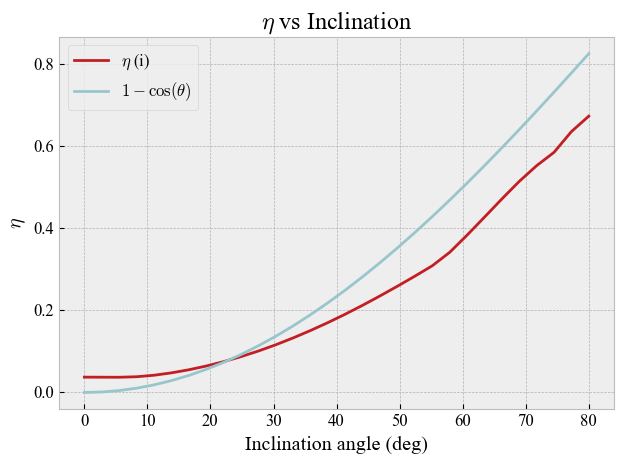

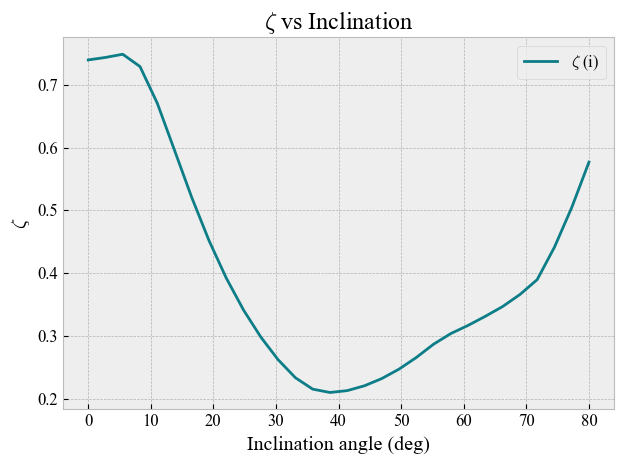

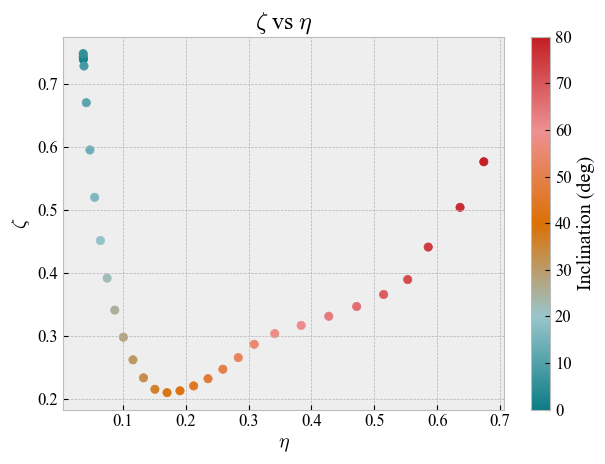

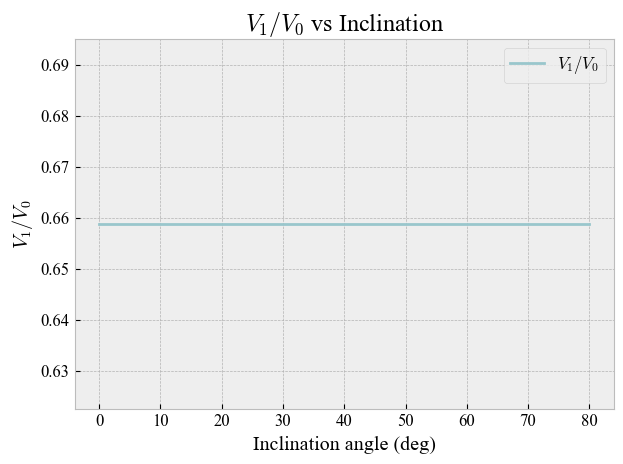

In [71]:
eta_list = []
n_max=10
m_max=10
inclinations = np.linspace(0, 80, 30)
cos=[]
for inc in inclinations:
    D = DiscGalaxy(N=N, a=a)
    D.rotate_disc(inc, 0, 0)
    D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)
    E = D.make_pointexpansion(m_max, n_max, a*1.5)
    costheta= np.cos(np.radians(inc))
    coscoefs = E.coscoefs
    sincoefs = E.sincoefs

    num = sum(np.sqrt(coscoefs[2, n]**2 + sincoefs[2, n]**2) for n in range(n_max))
    denom = sum(np.sqrt(coscoefs[0, n]**2) for n in range(n_max))
    
    eta = num / denom if denom != 0 else np.nan
    eta_list.append(eta)
    cos.append(1-costheta)

plt.plot(inclinations, eta_list, label=r'$\eta$ (i)', color='#c31e23')
plt.plot(inclinations,cos, label=r'$1-\cos(\theta)$', color='#99c6cc')
plt.title(r"$\eta$ vs Inclination")
plt.xlabel("Inclination angle (deg)")
plt.ylabel(r"$\eta$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

zeta_list = []
for inc in inclinations:
    D = DiscGalaxy(N=N, a=a)
    D.rotate_disc(inc, 0, 0)
    D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)
    E = D.make_pointexpansion(m_max, n_max, a*1.5)
    
    coscoefs = E.coscoefs
    sincoefs = E.sincoefs
    num = sum(np.sqrt(coscoefs[4, n]**2 + sincoefs[4, n]**2) for n in range(n_max))
    denom = sum(np.sqrt(coscoefs[2, n]**2 + sincoefs[2, n]**2) for n in range(n_max))

    zeta = num / denom if denom != 0 else np.nan
    zeta_list.append(zeta)
    
plt.plot(inclinations, zeta_list, label=r'$\zeta$ (i)', color='#0d7d87')

plt.title(r"$\zeta$ vs Inclination")
plt.xlabel("Inclination angle (deg)")
plt.ylabel(r"$\zeta$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()  

plt.scatter(eta_list, zeta_list, c=inclinations, cmap=my_gradient)
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\zeta$")
plt.colorbar(label="Inclination (deg)")
plt.title(r"$\zeta$ vs $\eta$")
plt.grid(True)
plt.tight_layout()
plt.show()

ratios_01 = []
for inc in inclinations:
    D = DiscGalaxy(N=N, a=a)
    D.rotate_disc(inc, 0, 0)
    D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)
    E = D.make_pointexpansion(m_max, n_max, a*1.5)
        
    c00 = coscoefs[0,0]
    c01 = coscoefs[0,1]
    ratio = np.sqrt(c01**2) / np.sqrt(c00**2) if c00 != 0 else np.nan
    ratios_01.append(ratio)


plt.plot(inclinations, ratios_01, label=r"$V_1/V_0$", color='#99c6cc')
plt.title(r"$V_1/V_0$ vs Inclination")
plt.xlabel("Inclination angle (deg)")
plt.ylabel(r"$V_1/V_0$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()